# Global Power Plant Database

Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database:

The database includes the following indicators:

1. `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
2. `country_long` (text): longer form of the country designation
3. `name` (text): name or title of the power plant, generally in Romanized form
4. `gppd_idnr` (text): 10 or 12 character identifier for the power plant
5. `capacity_mw` (number): electrical generating capacity in megawatts
6. `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
7. `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
8. `primary_fuel` (text): energy source used in primary electricity generation or export
9. `other_fuel1` (text): energy source used in electricity generation or export
10. `other_fuel2` (text): energy source used in electricity generation or export
11. `other_fuel3` (text): energy source used in electricity generation or export
12.  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
13. `owner` (text): majority shareholder of the power plant, generally in Romanized form
14. `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
15. `url` (text): web document corresponding to the `source` field
16. `geolocation_source` (text): attribution for geolocation information
17. `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
18. `year_of_capacity_data` (number): year the capacity information was reported
19. `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
20. `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
21. `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
22. `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
23. `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
24. `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
25. `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
26. `generation_data_source` (text): attribution for the reported generation information
27. `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
28. `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
29. `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
30. `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
31. `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
32. 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
34. `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
35. `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
36. `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
37. `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

# Importing the required libraries to load the dataset

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Exploratory Data Analysis(EDA)

In [5]:
df.shape #checking the shape of the dataset

(907, 27)

In [6]:
#We have 908 rows and 25 columns in data

In [7]:
df.isnull().sum() #checking the null value

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
#There are most of missing values in data

In [9]:
df.info() #checking the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From the above cell we get the information about the dataset which includes indexing type, column type, no-null values and memory usage . from this we can notice the presence of null-values.

In [10]:
#checking the columns
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [11]:
# checking the type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

So here we can see the dataset contains different features with different data types. Here there are two types of data namely object type and float64 data type . We will take care of the object datatype using encoding techniques later.

In [12]:
# checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

From the above cell we can check the no. of unique values present in each columns.

Here the columns country, country_long, other_fuel2, year_of_capacity_data and generation_data-source have only 1 unique value. Aslo other_fuel3, wepp_id, estimated_generation_gwh have no unique values which means they are filled with only NAN values. Since these columns have same entries thoughout the dataset so we can drop these columns.

In [13]:
# checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

There is only 1 country in th edataset wo we can drio this as it has nothing to do with our prediction also we can drop the column country_long on this basis

In [14]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [15]:
# dropping irrelavant columns
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [16]:
# checking the count of name
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

Here we can observe that the name column has unique name for each power plant so dropping this column is good to go.

In [17]:
df.drop(['name'],axis=1,inplace=True)

In [18]:
# checking the count of gppd-idnr
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

The column gppd_idnr also contains the unique ID of the power plant,the column Owner has more than 65% of null values also it may not important for prediction, the column url also have no relation with the targets and it has nothing to do with prediction so we can drop all these columns as well.

In [19]:
df.drop('gppd_idnr',axis=1,inplace=True)

In [20]:
df.drop('owner',axis=1,inplace=True)

In [21]:
df.drop('url',axis=1,inplace=True)

In the above cells we dropped the columns which are irrelavent and may not required for our prediction.

In [22]:
# checking the null values in the dataframe
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

So here we can see there are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

<AxesSubplot:>

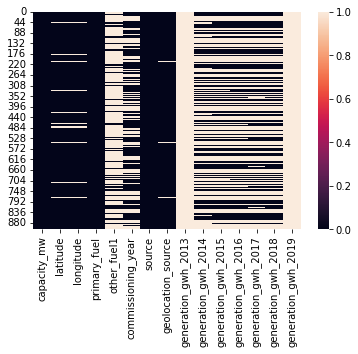

In [23]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

So here we can easily see the white lines in the heatmap which indicates the missing values in the dataset.

In [24]:
#checking the skewness
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

# Treating null values using imputation technique.

Most of the columns have missing values except the target variables and the feature source.

The columns latitude has numerical data and has no skewness and outliers so we can use mean method to fill the outliers

In [25]:
# let's check the mean of the latitude
df['latitude'].mean()       
# we can replace the null values using this mean

21.19791811846691

In [26]:
# filling missing values in latitude using mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

The features other_fuel1 and geolocation_source have categorical data so we can fill the null values using mode method.

In [27]:
# let's check the mode of other_fuel1
df['other_fuel1'].mode()          
# we can fill the null values using this code

0    Oil
dtype: object

In [28]:
# let's check the mode of geolocation_source column
df['geolocation_source'].mode()       
# we can fill the null values using this mode

0    WRI
dtype: object

So the modes of other_fuel1 and geolocation_source are Oil and WRI respectively which means they have more value counts in those columns .Let's fill the null values of categorical columns by their respective modes.

In [29]:
# Replacing the null value by its mode Oil
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [30]:
# filling null values by its mode WRI
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

The columns longitude commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh-2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method


In [31]:
# filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())

In [32]:
# let's check the null values if there any
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
source                   0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

Now we have removed all the null values using imputation method and the data is now clean. So we can move further.

<AxesSubplot:>

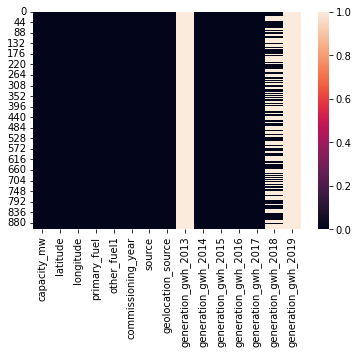

In [33]:
# let's visualize the null values clearly
sns.heatmap(df.isnull())

So it is clear that there are no missing values present in the dataset

In [34]:
# checking how many columns are there in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [35]:
#These are the columns present in the dataset

In [36]:
# checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [37]:
# ckecking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [38]:
# checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [39]:
# checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [40]:
# let's extract power plant age from commissioning year by subtraction it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

Here we have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [41]:
# let's check the data frame 
df.head()


,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,NaN,801.123775,711.181225,737.205450,817.977250,NaN,NaN,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,3.0


In [42]:
# checking wheather the dataset contains any space
df.loc[df['capacity_mw']==" "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age


From the above cell it seems that there are no spaces in the dataset.

In [43]:
# Statistical summary & hence describing the dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
count,907.000000,907.000000,907.000000,0.0,907.000000,907.000000,907.000000,907.000000,448.000000,0.0,907.000000
mean,326.223755,21.197918,77.427103,NaN,1516.689956,1510.071296,1565.361383,1657.121797,2600.804099,NaN,19.271224
std,590.085456,6.079148,4.815073,NaN,2785.604307,2984.994556,3005.087210,3046.862910,4314.880456,NaN,13.158621
min,0.000000,8.168900,68.644700,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,16.725000,17.072000,74.388900,NaN,801.123775,711.181225,737.205450,817.977250,193.378250,NaN,15.000000
50%,59.200000,21.281800,76.719500,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,17.000000
75%,385.250000,25.176450,79.206100,NaN,801.123775,711.181225,737.205450,817.977250,3143.535900,NaN,20.000000
max,4760.000000,34.649000,95.408000,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,91.000000


Above cell gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/invalid values present.

Before visualizing the data, let's Separate categorical and numerical columns.

In [44]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [45]:
# now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'Power_plant_age']


# Data Visualization

Plotting categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


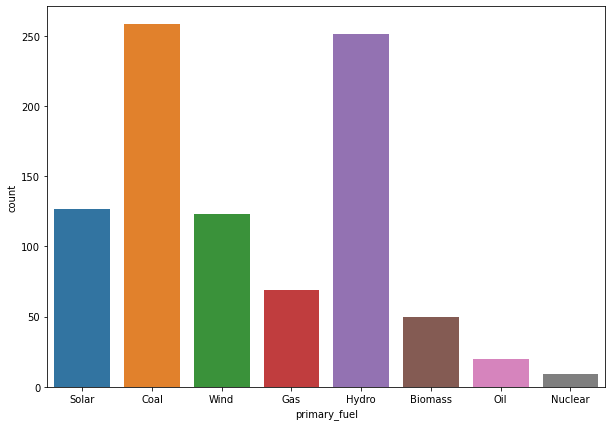

In [46]:
# Visualizing  the types of fuel in primary_fuel
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['primary_fuel'])
plt.show()

In the above cell the count plot shows the energy source used in primary electricity generation. Here using the source Coal(thermal) generates more electricity followed by Hydro(water) . Also the energy source Nuclear generates very less electricity compare to other.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


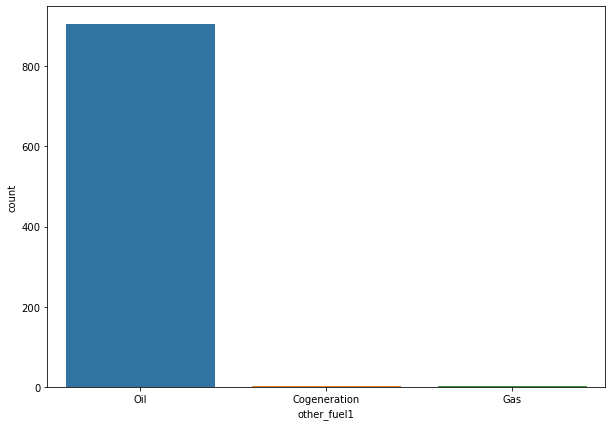

In [47]:
# visualizing the counts of other fuel
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df['other_fuel1'])
plt.show()

Here we can see there are 3 unique values in other_fuel1 and the count of oil is higher than cogeneration and gas.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


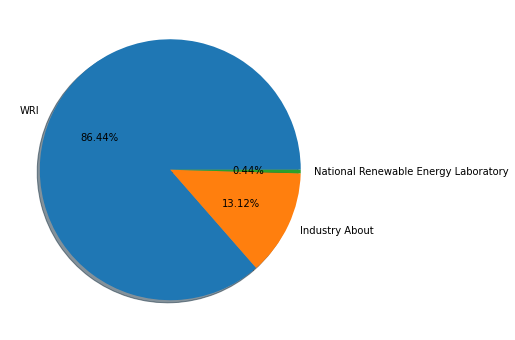

In [48]:
#Visualizing the counts of owner
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(8,6))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

As in the above cell the plot shows that the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geolocation information compare to other two sources.

~ Distribution of skewness ~

Plotting Numerical Columns

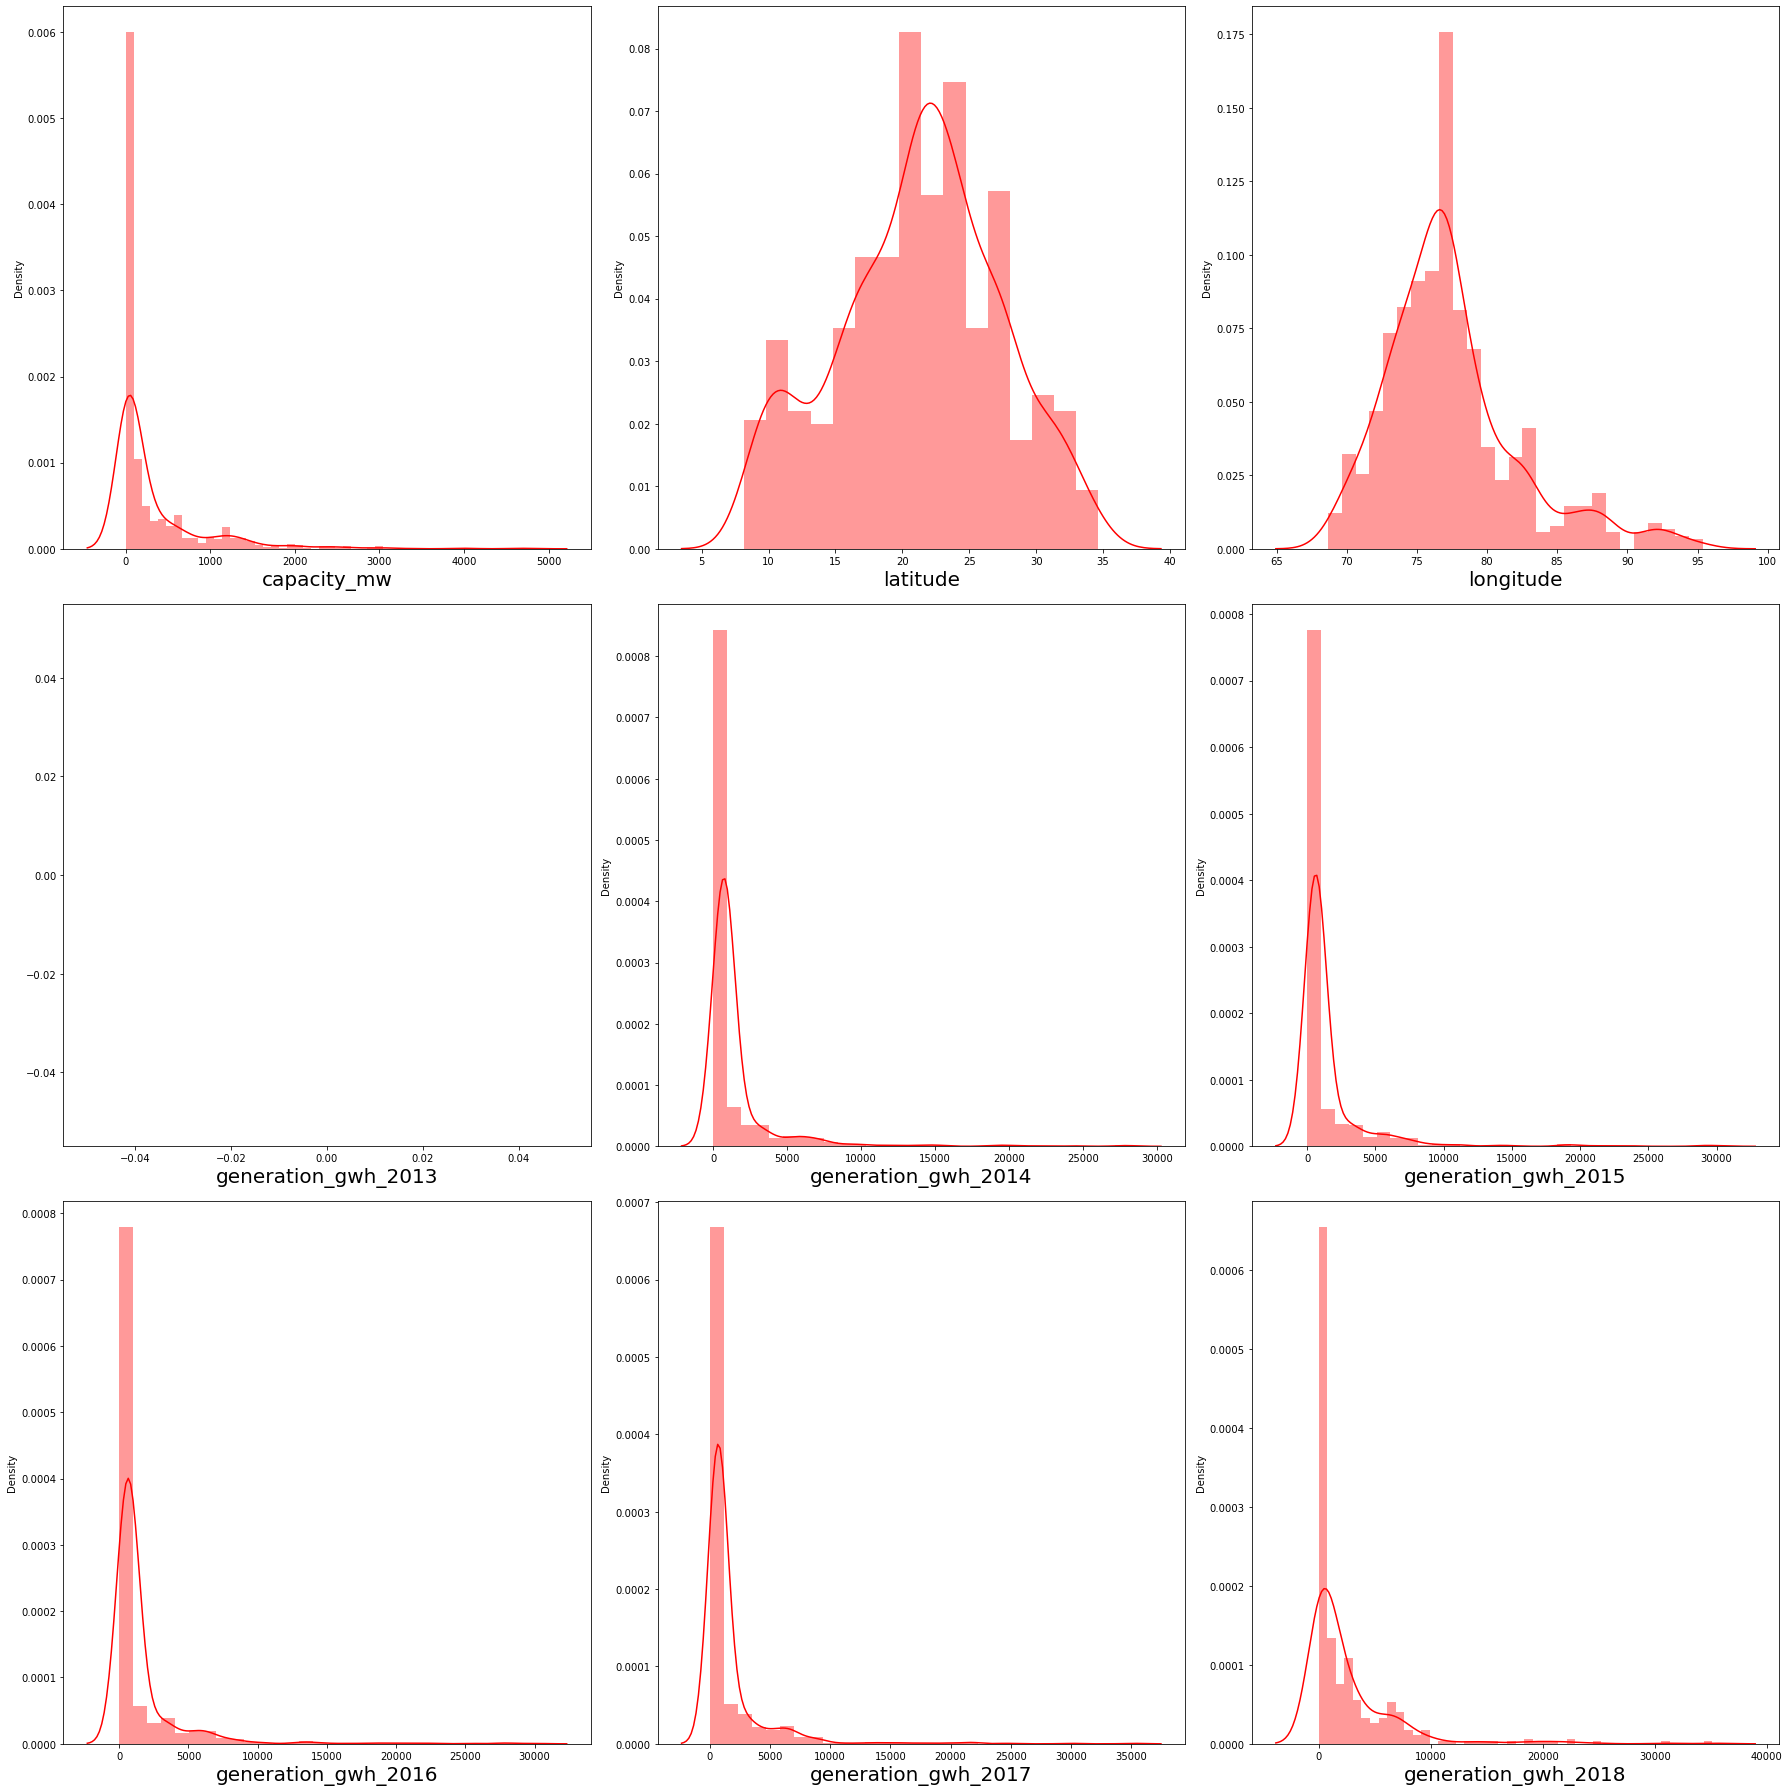

In [49]:
# checking how the data has been distributed in each column
plt.figure(figsize=(25,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- From the above distribution plots we can observe that the data is not normally distributed in all the columns except   latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove these skewness in all the coluns except the label in the later part.

Comparing target varibale capacity_mw with features

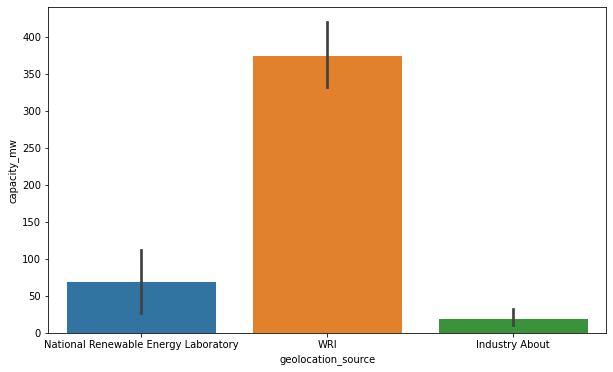

In [50]:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more than 350 mega watts. The geolocation source industry about has less capacity

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

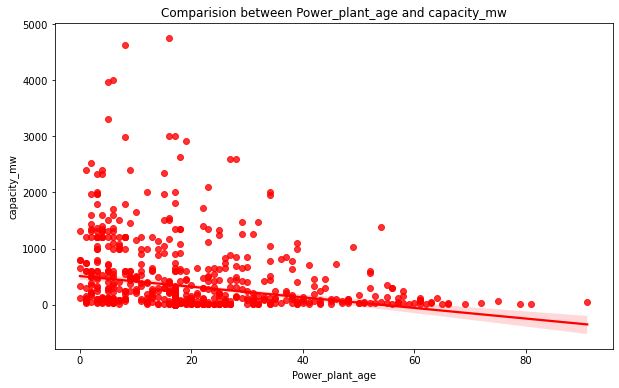

In [51]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = 'r')

From the above plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.

<AxesSubplot:title={'center':'Comparision between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

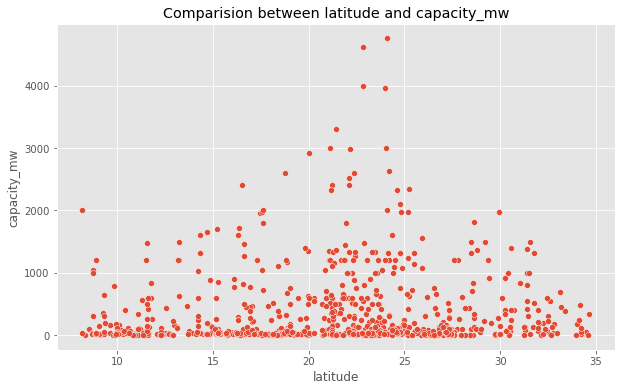

In [52]:
# let's check how the capacity is related to latitude  of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df['capacity_mw'])

The plot shows that there is no linear relation between latitude and capacity of the power plant . We can notice the capacity of power plant is very less in this case also we can see some outliers present hear.

<AxesSubplot:title={'center':'Comparision between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

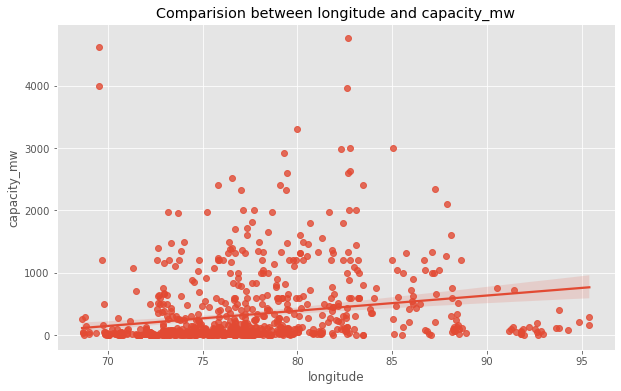

In [53]:
# let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df['capacity_mw'])

There is very weak linear relation between longitude and capacity. Here the longitude ranges from 74-82 has more capacity upto 2000. And we can also observe the presence of outliers.

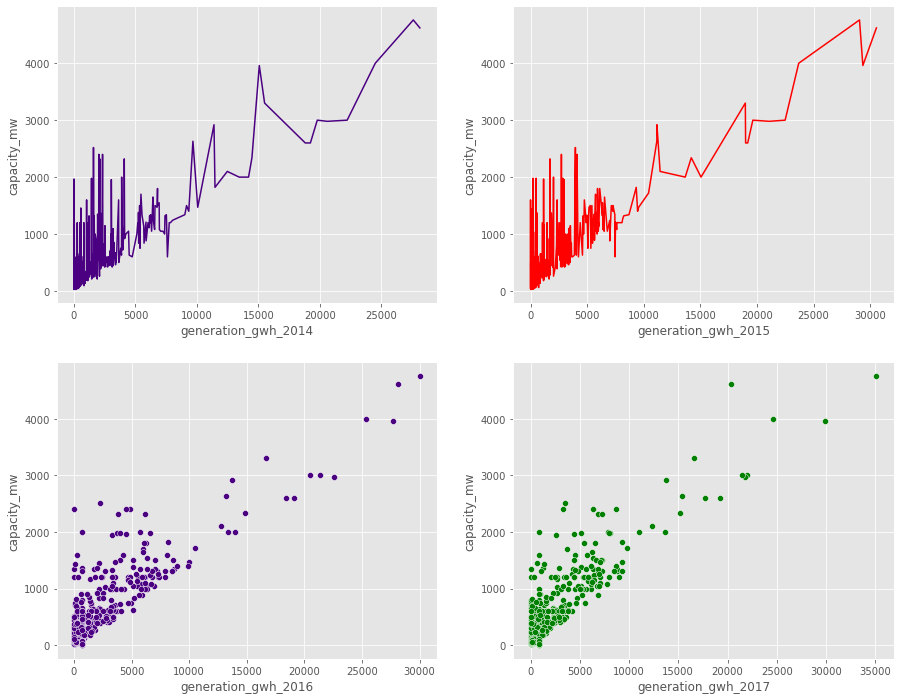

In [54]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='indigo')

# checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='r')

# checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='indigo')

# checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='g')
plt.show()

- There is positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows how the electricity generation reported for the years 2014 , 2015, 2016, 2017 have high capacity of above 1000mw . Also power generation growrh is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant is also increasing moderately.

# Comparing the target variable Primary Fuel with other features

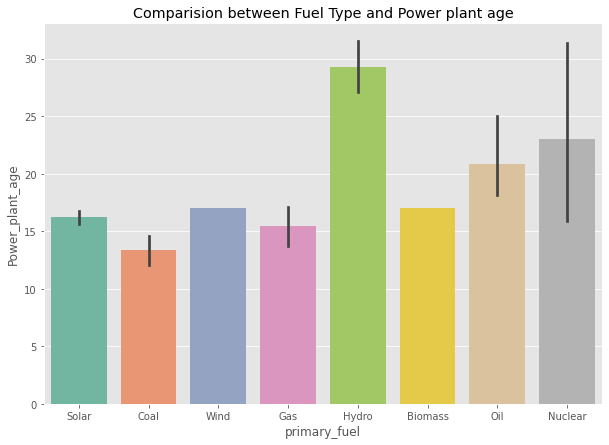

In [55]:
# Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,7))
plt.title("Comparision between Fuel Type and Power plant age")
sns.barplot(x='primary_fuel',y='Power_plant_age', data=df,palette='Set2')
plt.show()

From the above cell we can see most of the power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.
The power plants which are recently constructed uses Solar, Coal and Gas to gererate the power

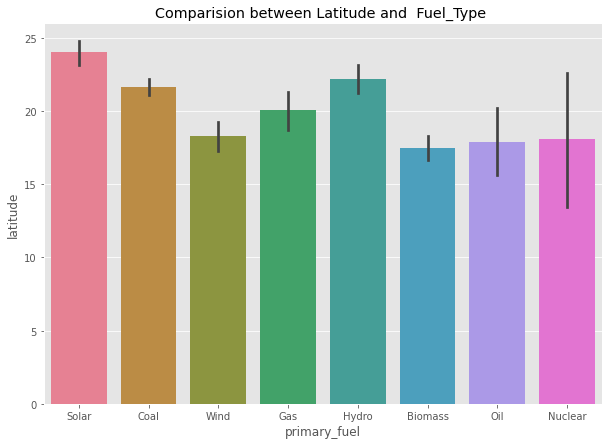

In [56]:

# Lets check how the fuel type is related to latitude of the power plant 
plt.figure(figsize = (10,7))
plt.title("Comparision between Latitude and  Fuel_Type ")
sns.barplot(df['primary_fuel'],df['latitude'],palette='husl');

So here we can observe that the fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

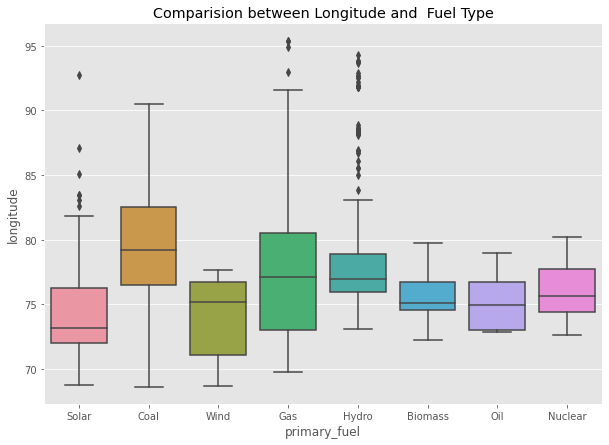

In [57]:
# Lets check how the fuel is related to longitude of the power plant 
plt.figure(figsize = [10,7])
plt.style.use('ggplot')
plt.title("Comparision between Longitude and  Fuel Type")
sns.boxplot(df['primary_fuel'],df['longitude']);

The fuel type Gas has high longitude followed by Hydro , Solar and Coal other fuel types have very less longitude.

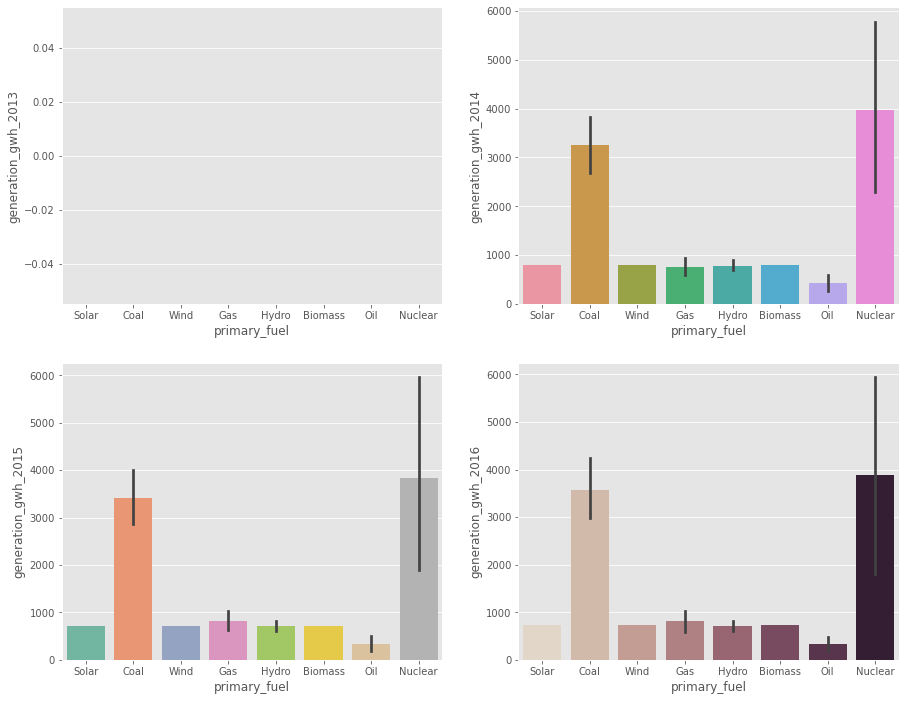

In [58]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

#checking attrition level in Dailyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# checking attrition level in hourlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# checking attrition level in Monthlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# checking attrition level Monthlyincome
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

From the graph we can notice the fuel type Nuclear has high electrical generation reports for all the years followed by Coal.
Other fuel types have very less power generation reports.

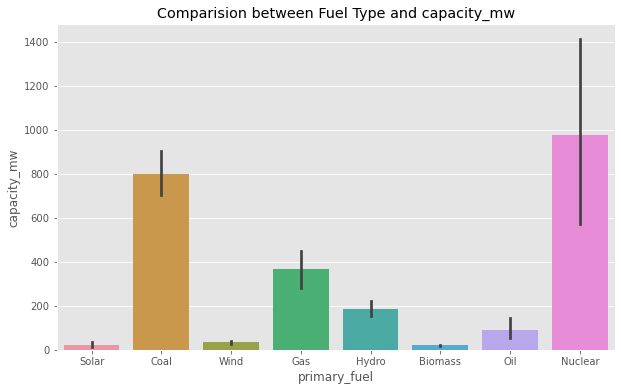

In [59]:
# let's check the relation between fuel type and capacity_mw
plt.figure(figsize=(10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x= 'primary_fuel',y = 'capacity_mw',data = df)
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal.
Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

# Label Encoding

In [60]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [61]:
LE=LabelEncoder()
df[categorical_col]= df[categorical_col].apply(LE.fit_transform)

In [62]:
df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


# Handling the outliers

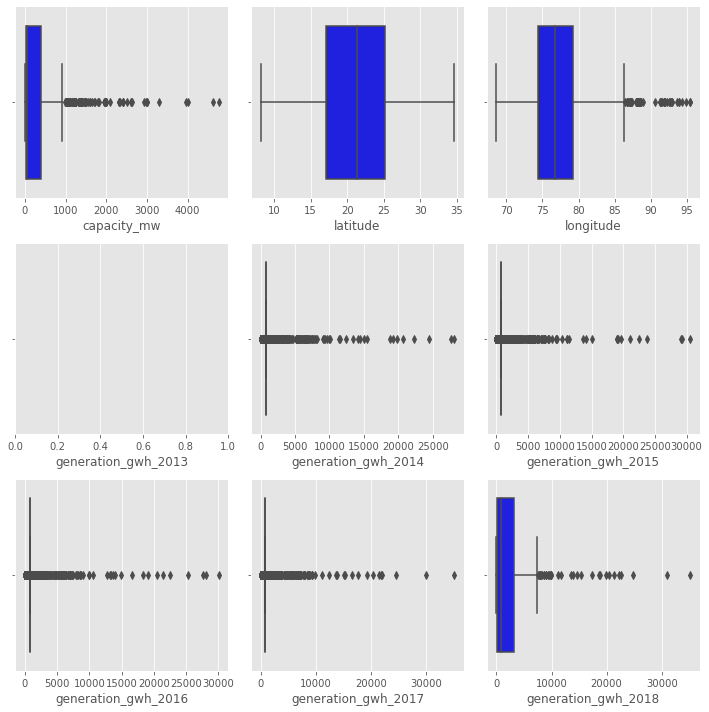

In [63]:
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="blue")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In the boxplot we can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method.

# Removing Outliers by using ZScore method

In [64]:
# features containing outliers
features = df[['longitude','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']]

In [65]:
#using zscore method to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
threshold=3
np.where(z>3)

(array([ 15,  15,  15, 143, 143, 143, 143, 158, 179, 183, 209, 209, 209,
        209, 219, 222, 244, 308, 308, 308, 308, 323, 333, 340, 342, 360,
        364, 364, 364, 364, 371, 416, 427, 444, 454, 478, 484, 493, 493,
        493, 493, 494, 494, 494, 494, 499, 519, 532, 538, 541, 546, 573,
        577, 583, 592, 601, 621, 623, 638, 648, 648, 648, 648, 657, 657,
        657, 657, 695, 695, 695, 695, 706, 709, 721, 721, 721, 721, 724,
        724, 724, 724, 726, 726, 726, 726, 728, 786, 786, 786, 786, 807,
        808, 808, 808, 808, 818, 847, 848, 880, 880, 880, 880], dtype=int64),
 array([3, 4, 5, 2, 3, 4, 5, 2, 0, 0, 2, 3, 4, 5, 6, 6, 0, 2, 3, 4, 5, 0,
        0, 0, 6, 0, 2, 3, 4, 5, 6, 0, 0, 6, 6, 6, 6, 2, 3, 4, 5, 2, 3, 4,
        5, 0, 0, 2, 6, 6, 0, 6, 0, 6, 6, 6, 6, 2, 0, 2, 3, 4, 5, 2, 3, 4,
        5, 2, 3, 4, 5, 6, 6, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 6, 2, 3,
        4, 5, 6, 2, 3, 4, 5, 0, 0, 6, 2, 3, 4, 5], dtype=int64))

In [66]:
# creating new dataframe
new_df=z
new_df

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,0.869917,NaN,0.257022,0.267783,0.275737,0.275565,0.933076
1,0.585590,NaN,0.257022,0.267783,0.275737,0.275565,0.172699
2,1.673567,NaN,0.257022,0.267783,0.275737,0.275565,0.172699
3,2.895239,NaN,0.322873,0.223348,0.226194,0.326203,0.400812
4,1.035238,NaN,0.545554,1.476964,1.557432,1.224379,1.237227
...,...,...,...,...,...,...,...
902,0.014609,NaN,0.257022,0.505833,0.443415,0.259992,1.313265
903,0.153415,NaN,0.257022,0.267783,0.275737,0.275565,0.172699
904,0.383592,NaN,0.257022,0.267783,0.275737,0.275565,0.172699
905,0.764564,NaN,0.257022,0.267783,0.275737,0.275565,0.172699


In [67]:
 df.shape

(907, 15)

In [68]:
new_df.shape

(907, 7)

# IQR METHOD(Inter Quantile Range)

In [69]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [70]:
df1.shape

(420, 15)

So we can notice here that after using IQR method data have 420 rows and 15 columns

In [71]:
# let's check the dataloss
data_loss = (907-422)/907*100
data_loss

53.47298787210585

We can observe here that using IQR method we are losing 53% of data which is huge. so considering zscore method for better result.

# Correlation between the target variable and features using HEAT map

In [72]:
# checking the correlation between features and the target
cor = new_df.corr()
cor

,longitude,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
longitude,1.000000,NaN,0.080116,0.080645,0.084050,0.079576,-0.010294
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.080116,NaN,1.000000,0.961892,0.937643,0.902364,0.027788
generation_gwh_2015,0.080645,NaN,0.961892,1.000000,0.972407,0.938953,0.039576
generation_gwh_2016,0.084050,NaN,0.937643,0.972407,1.000000,0.968338,0.051572
generation_gwh_2017,0.079576,NaN,0.902364,0.938953,0.968338,1.000000,0.059344
Power_plant_age,-0.010294,NaN,0.027788,0.039576,0.051572,0.059344,1.000000


In [ ]:
#removing the skewness bydroping the nan values column and row

In [89]:
df1=cor.drop("generation_gwh_2013", axis=1).drop("generation_gwh_2013", axis=0)

In [90]:
df1

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
longitude,1.000000,0.080116,0.080645,0.084050,0.079576,-0.010294
generation_gwh_2014,0.080116,1.000000,0.961892,0.937643,0.902364,0.027788
generation_gwh_2015,0.080645,0.961892,1.000000,0.972407,0.938953,0.039576
generation_gwh_2016,0.084050,0.937643,0.972407,1.000000,0.968338,0.051572
generation_gwh_2017,0.079576,0.902364,0.938953,0.968338,1.000000,0.059344
Power_plant_age,-0.010294,0.027788,0.039576,0.051572,0.059344,1.000000


This gives the correlation between the dependent and independent variables. We can visualize this by plotting heat map.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'longitude'),
  Text(0, 1.5, 'generation_gwh_2014'),
  Text(0, 2.5, 'generation_gwh_2015'),
  Text(0, 3.5, 'generation_gwh_2016'),
  Text(0, 4.5, 'generation_gwh_2017'),
  Text(0, 5.5, 'Power_plant_age')])

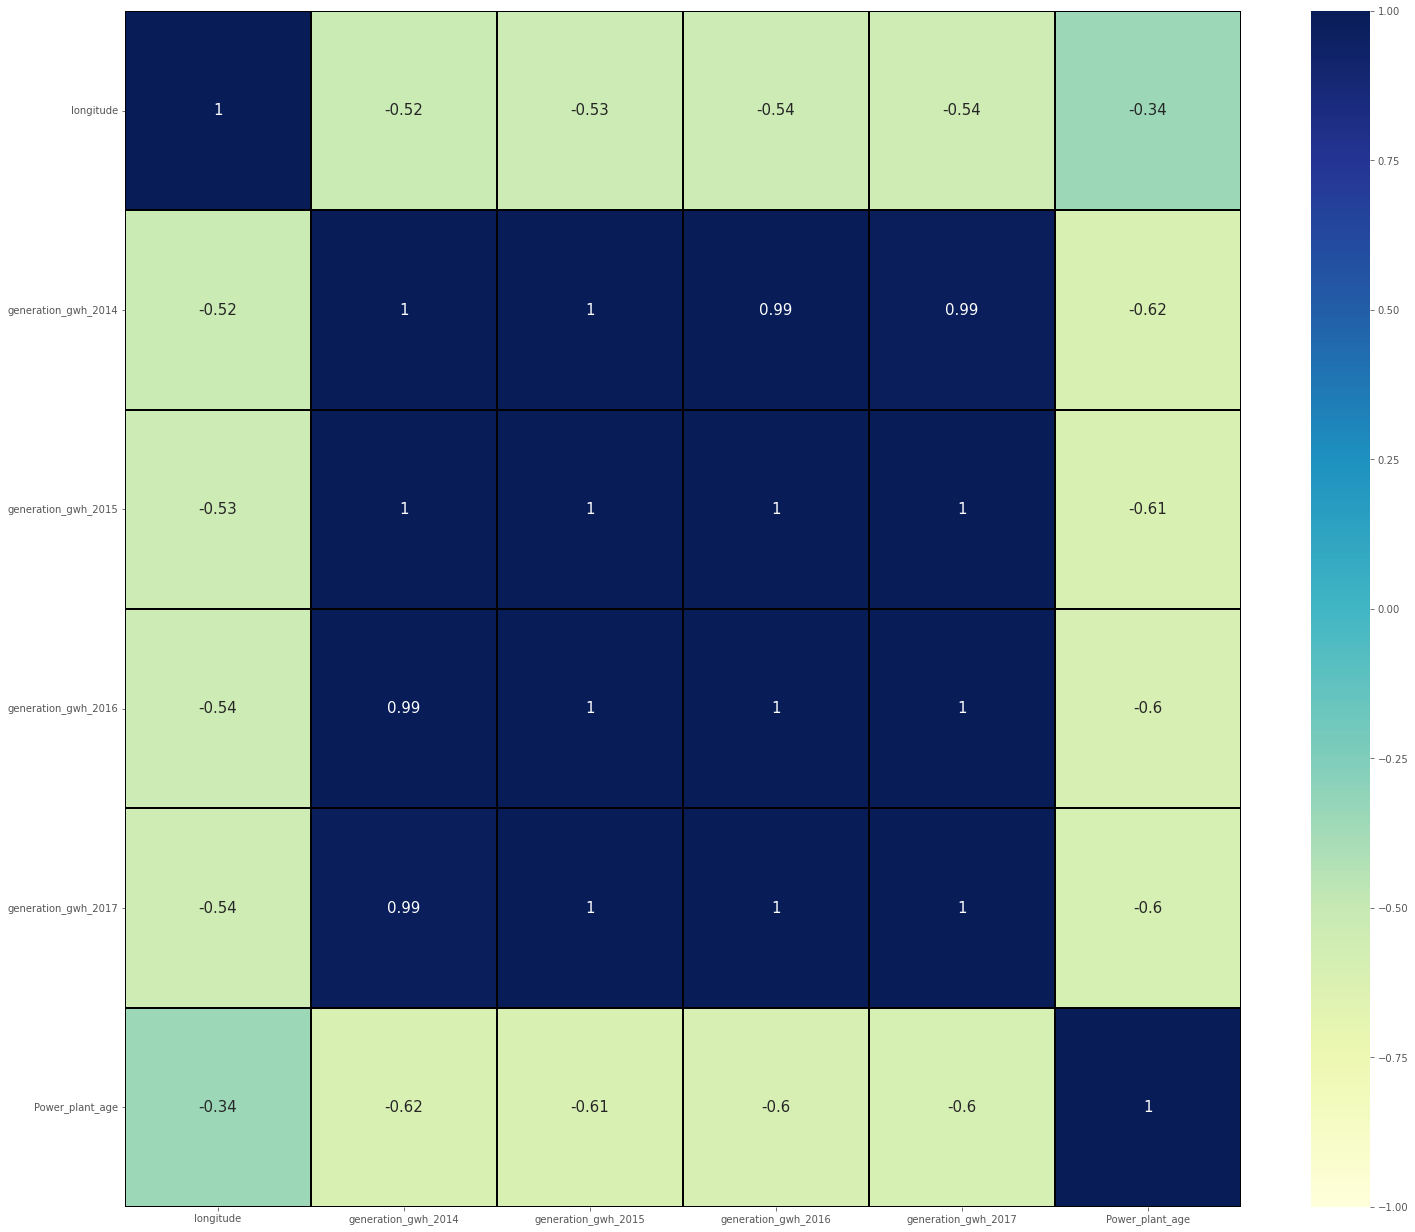

In [92]:
# visualizing the correlation matrix by plotting heat map
plt.figure(figsize=(25,22))
sns.heatmap(df1.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

In [74]:
x= df.drop('capacity_mw',axis=1)
y= df['capacity_mw']

In [75]:
x.shape

(907, 14)

In [76]:
y.shape

(907,)

Checking for SKEWNESS

In [77]:
x.skew()

latitude               -0.149698
longitude               1.163320
primary_fuel            0.472251
other_fuel1           -20.453120
source                  1.827373
geolocation_source     -2.159841
generation_gwh_2013          NaN
generation_gwh_2014     5.321360
generation_gwh_2015     5.566773
generation_gwh_2016     5.281953
generation_gwh_2017     5.315103
generation_gwh_2018     3.476298
generation_gwh_2019          NaN
Power_plant_age         1.719575
dtype: float64

In [91]:
# checking skewness after using yeo-johnson method
df1.skew()

longitude              2.397759
generation_gwh_2014   -0.953323
generation_gwh_2015   -0.963960
generation_gwh_2016   -0.962541
generation_gwh_2017   -0.947493
Power_plant_age        2.428181
dtype: float64

So here successfully removed the skewness from all the numerical columns using yeo-johnson method.

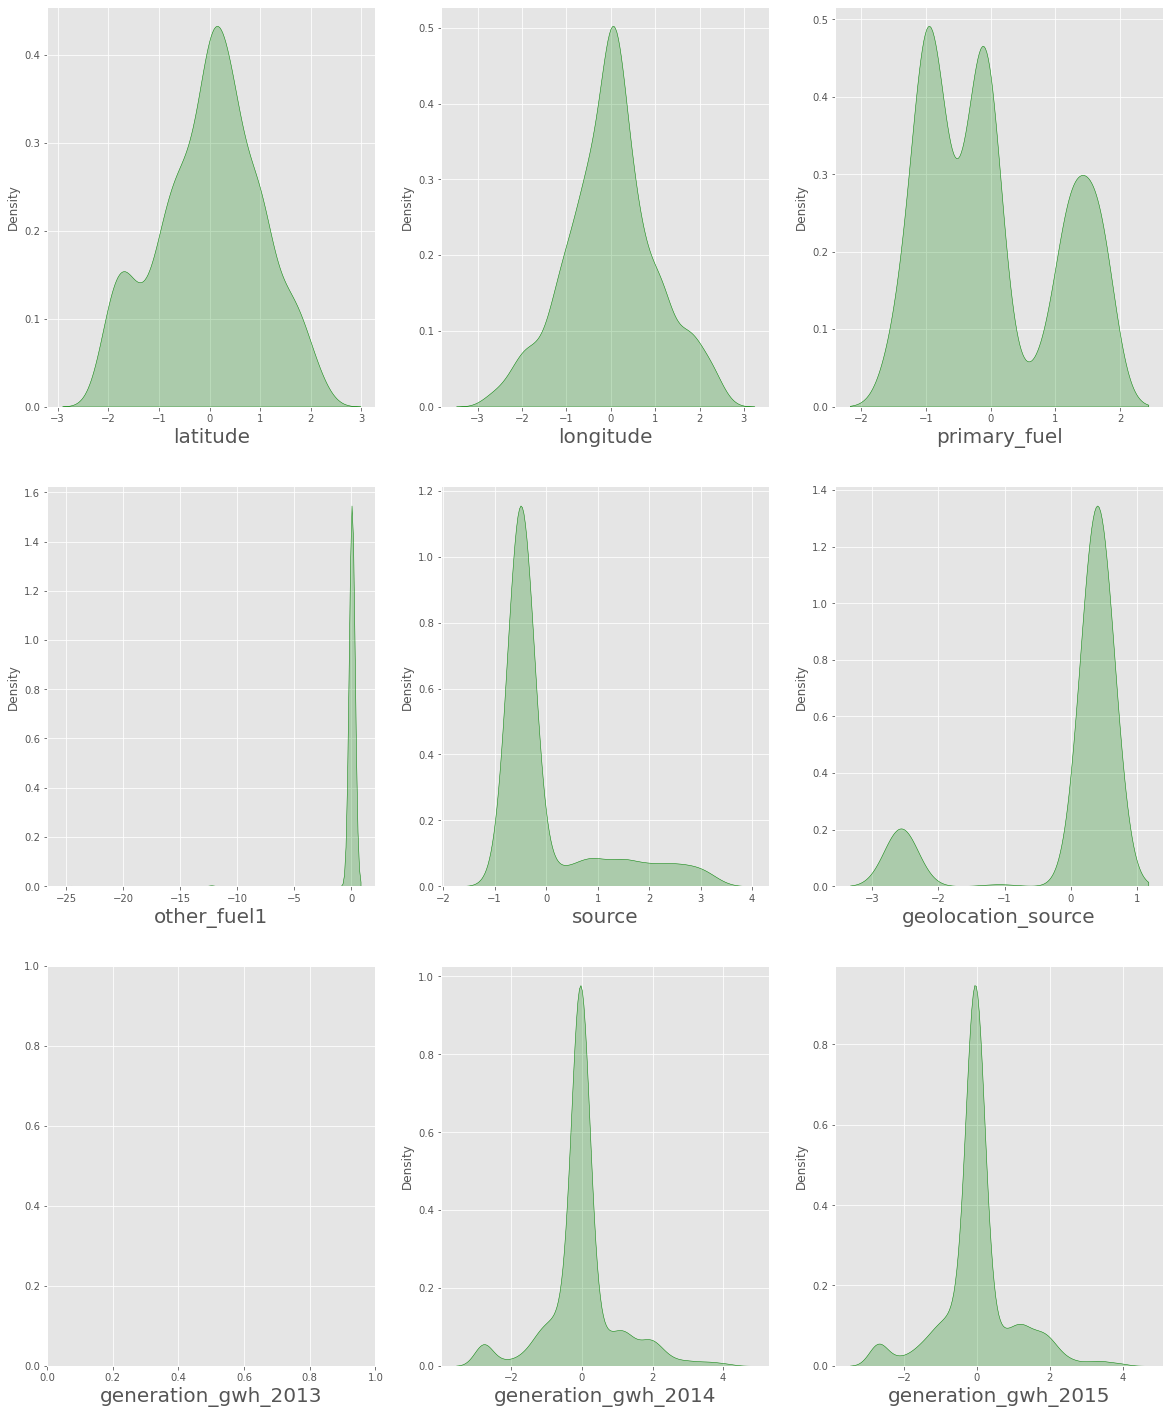

In [94]:
# checking how the data has been distributed in each columns.
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[df1]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has been reduced in all the columns

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,1.149805,-0.944855,1.225688,0.054303,1.460215,-1.083349,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN,-1.053364
1,0.587311,-0.534213,-0.967877,0.054303,2.917019,0.394241,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN,0.016990
2,0.116179,-2.390933,1.664401,0.054303,-0.512075,0.394241,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN,0.016990
3,0.439989,2.167755,-0.529164,0.054303,-0.489662,0.394241,NaN,-0.243102,0.072704,0.083178,-0.185637,-0.458129,NaN,-0.251691
4,0.125479,1.126913,-0.967877,0.054303,-0.489662,0.394241,NaN,1.152947,1.836146,1.842814,1.621580,1.085413,NaN,-1.749865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,-0.806975,0.166816,-0.967877,0.054303,-0.489662,0.394241,NaN,-0.046742,-2.579263,-0.782355,0.001238,-0.444148,NaN,-1.991468
903,-1.366853,0.346098,1.225688,0.054303,0.743019,-2.560940,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN,0.016990
904,-0.974707,-0.268686,1.664401,0.054303,-0.512075,0.394241,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN,0.016990
905,0.518793,-0.787375,-0.967877,0.054303,0.339596,0.394241,NaN,-0.046742,-0.052449,-0.050215,-0.039359,NaN,NaN,0.016990


In [102]:
x1=x.drop(["generation_gwh_2013","generation_gwh_2018","generation_gwh_2019"], axis=1)

In [103]:
x1

,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,1.149805,-0.944855,1.225688,0.054303,1.460215,-1.083349,-0.046742,-0.052449,-0.050215,-0.039359,-1.053364
1,0.587311,-0.534213,-0.967877,0.054303,2.917019,0.394241,-0.046742,-0.052449,-0.050215,-0.039359,0.016990
2,0.116179,-2.390933,1.664401,0.054303,-0.512075,0.394241,-0.046742,-0.052449,-0.050215,-0.039359,0.016990
3,0.439989,2.167755,-0.529164,0.054303,-0.489662,0.394241,-0.243102,0.072704,0.083178,-0.185637,-0.251691
4,0.125479,1.126913,-0.967877,0.054303,-0.489662,0.394241,1.152947,1.836146,1.842814,1.621580,-1.749865
...,...,...,...,...,...,...,...,...,...,...,...
902,-0.806975,0.166816,-0.967877,0.054303,-0.489662,0.394241,-0.046742,-2.579263,-0.782355,0.001238,-1.991468
903,-1.366853,0.346098,1.225688,0.054303,0.743019,-2.560940,-0.046742,-0.052449,-0.050215,-0.039359,0.016990
904,-0.974707,-0.268686,1.664401,0.054303,-0.512075,0.394241,-0.046742,-0.052449,-0.050215,-0.039359,0.016990
905,0.518793,-0.787375,-0.967877,0.054303,0.339596,0.394241,-0.046742,-0.052449,-0.050215,-0.039359,0.016990


# Checking VIF (Variance Inflation Factor ) Values

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x1.values,i)
              for  i in range(len(x1.columns))]
vif['features'] = x1.columns

# let's check the values
vif


,VIF values,features
0,1.075606,latitude
1,1.286383,longitude
2,1.697792,primary_fuel
3,1.014107,other_fuel1
4,1.521443,source
5,1.983380,geolocation_source
6,4.066890,generation_gwh_2014
7,6.851236,generation_gwh_2015
8,10.708546,generation_gwh_2016
9,5.561537,generation_gwh_2017


SO here we can observe all the columns have VIF less than 10 .

Which means we are free from multicolinearity problem .

Let's move to building machine learning models.

In [106]:
# DataFrame after preprocessing and data cleaning
x1.head()

,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,Power_plant_age
0,1.149805,-0.944855,1.225688,0.054303,1.460215,-1.083349,-0.046742,-0.052449,-0.050215,-0.039359,-1.053364
1,0.587311,-0.534213,-0.967877,0.054303,2.917019,0.394241,-0.046742,-0.052449,-0.050215,-0.039359,0.016990
2,0.116179,-2.390933,1.664401,0.054303,-0.512075,0.394241,-0.046742,-0.052449,-0.050215,-0.039359,0.016990
3,0.439989,2.167755,-0.529164,0.054303,-0.489662,0.394241,-0.243102,0.072704,0.083178,-0.185637,-0.251691
4,0.125479,1.126913,-0.967877,0.054303,-0.489662,0.394241,1.152947,1.836146,1.842814,1.621580,-1.749865


# Modeling

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [109]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9152908312038127  on Random_state  151


# Creating new train test split

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=maxRS)

*Regression algorithms*


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest Regressor

In [113]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 0.9072647441054995
MAE: 106.87772473277543
MSE: 44306.70429722494
RNSE: 210.4915777346565


# Decision Tree Regressor

In [114]:
# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 0.8369579637556286
MAE: 134.21489010989012
MSE: 77897.61529439194
RNSE: 279.1014426591019


# KNeighbors Regressor

In [115]:
# checking r2 score for Kneighbors regressor
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 0.8300181771471496
MAE: 129.62149304029305
MSE: 81213.280627731
RNSE: 284.9794389560956


# Bagging Regressor

In [116]:
# checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 0.913009382514007
MAE: 101.62428996241852
MSE: 41562.052408305986
RNSE: 203.86773263149317


# Checking the cross validation score

In [119]:
# checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x1,y,cv=5).mean())

# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x1,y,cv=5).mean())

# checking cv score for KNN Regressor
print(cross_val_score(knn,x1,y,cv=5).mean())

# checking cv score for Bagging Regressor
print(cross_val_score(BR,x1,y,cv=5).mean())

0.8330825635334967
0.7156789007385094
0.8044537410808108
0.822812193059768


# Hyper Parameter Tuning

In [120]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [121]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [122]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

In [123]:
capacity = RandomForestRegressor(criterion='mse',max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 210.4915777346565
R2_Score: 91.02716014845362


# Saving the Model

In [124]:
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']